In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp
import math

plt.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:
J = [{'tf' : [0.3, None, None, None, 0.2, None, None, None], 'pd' : [None, 0.1, None, 0.1]}, {'tf' : [None, None, None, None, 0.2, 0.1, None, None], 'pd' : []}, {'tf' : [None, None, 0.15, None, None, None, 0.1, None], 'pd' : [0.1, None, 0.1, None]}, {'tf' : [None, None, None, 0.05, None, None, None, 0.1], 'pd' : []}, {'tf' : [0.3, 0.15, None, None, None, None, None, None], 'pd' : []}]

C = 1.87
C_ped = [0.57,0.544,0.552,0.54]
T_loss = 0.792
T_loss_ped = [0.585,0.580,0.581,0.579]
T = 180

w = [8.21, 7.87, 7.97, 7.82]
l = [38.3, 33.66, 37.77, 25.23]
v = 0.85

π = math.pi

In [ ]:
 def EQGE(φ):
  eqge = 0
  for i, φi in enumerate(φ):
    # 차량
    for j in J[i]['tf']:
      if j == None: continue
      eqge += (j - C * (φi - T_loss / T))**2
    # 보행자
    for j, ji in enumerate(J[i]['pd']):
      if ji == None: continue
      eqge += (ji - C_ped[j] * (φi - T_loss_ped[j] / T))**2
  return eqge

def a(φ, i, j):
  t = T * (1 - φ[i])
  ji = J[i]['pd'][j]
  return ((2 * π * ji * t + w[j]**2)**0.5 - w[j]) / π

def safety(φ):
  cons = []
  bias = 0
  for i, φi in enumerate(φ):
    if  not J[i]['pd']: continue
    for j, ji in enumerate(J[i]['pd']):
      if ji == None: continue
      ped = [φ[i] * T - (l[j] + a(φ, i, j))/v - bias]
      cons += ped
  return cons


def sum_eq_1(φ):
  return [sum(φ) - 1]

def callback(x):
    values.append(EQGE(x))

In [ ]:
φ0 = np.array([40/T, 35/T, 40/T, 25/T, 40/T])
bounds = [(0, 1)] * np.size(φ0)

# 최적화 경로와 목적 함수 값 저장
values = []

result = fmin_slsqp(EQGE, φ0, bounds=bounds, callback=callback, eqcons=[sum_eq_1], ieqcons=[safety], iter=100)

print(result)
print(result * T)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4880055836398572
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6
[0.22903319 0.17071168 0.25883065 0.13060365 0.21082082]
[41.22597493 30.72810299 46.58951765 23.50865639 37.94774804]


In [ ]:
for idx, value in enumerate(values):
    print(f"Step {idx}: Objective value = {value}")

Step 0: Objective value = 0.8177085780416398
Step 1: Objective value = 0.48949075135059283
Step 2: Objective value = 0.4889339402792131
Step 3: Objective value = 0.48837583759960035
Step 4: Objective value = 0.4880055836398572
Step 5: Objective value = 0.4880055836398572


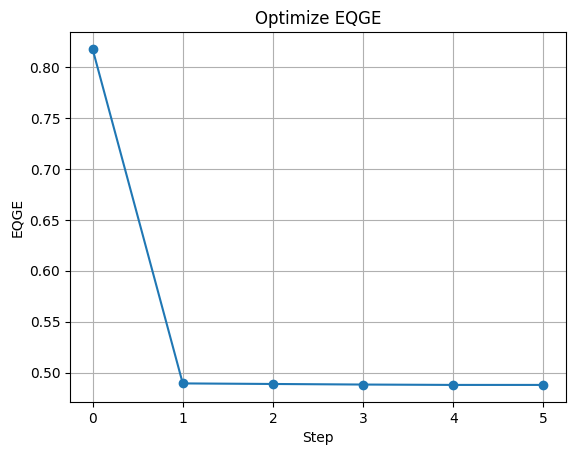

In [ ]:
x = range(len(values))
y = values

plt.plot(x, y, marker='o')  # 꺽은선 그래프 그리기
plt.title("Optimize EQGE")  # 그래프 제목 설정
plt.xlabel("Step")  # x축 라벨 설정
plt.ylabel("EQGE")  # y축 라벨 설정
plt.grid(True)  # 격자 표시

plt.show()  # 그래프 보여주기